# Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Baca file .CSV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Skripsi/dataset/batikAir_cleaned3.csv')
df

,TGL,delay
0,2020-08-01,16.0
1,2020-08-02,19.0
2,2020-08-03,10.0
3,2020-08-05,2.0
4,2020-08-07,3.0
...,...,...
1293,2024-06-26,271.0
1294,2024-06-27,385.0
1295,2024-06-28,455.0
1296,2024-06-29,591.0


# BPNN

In [ ]:
df

,TGL,delay
0,2020-08-01,16.0
1,2020-08-02,19.0
2,2020-08-03,10.0
3,2020-08-05,2.0
4,2020-08-07,3.0
...,...,...
1293,2024-06-26,271.0
1294,2024-06-27,385.0
1295,2024-06-28,455.0
1296,2024-06-29,591.0


---

Batik

In [ ]:
# Misal, df adalah DataFrame yang sudah memiliki kolom 'delay' yang ingin diprediksi
# Normalisasi data 'delay'
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(df[['delay']])

# Gunakan delay sebagai input dan target
X = y  # Dalam hal ini, kita hanya menggunakan delay sebagai input

In [ ]:
df['delay_normalized'] = y  # Tambahkan sebagai kolom baru
print(df)  # Cetak DataFrame dengan kolom 'y' yang baru

             TGL  delay  delay_normalized
0     2020-08-01   16.0          0.017045
1     2020-08-02   19.0          0.020455
2     2020-08-03   10.0          0.010227
3     2020-08-05    2.0          0.001136
4     2020-08-07    3.0          0.002273
...          ...    ...               ...
1293  2024-06-26  271.0          0.306818
1294  2024-06-27  385.0          0.436364
1295  2024-06-28  455.0          0.515909
1296  2024-06-29  591.0          0.670455
1297  2024-06-30  484.0          0.548864

[1298 rows x 3 columns]


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Skripsi/dataset/normalized.csv', index=False)

Citilink

In [ ]:
df

,TGL,delay
0,2020-08-01,16.0
1,2020-08-02,19.0
2,2020-08-03,10.0
3,2020-08-05,2.0
4,2020-08-07,3.0
...,...,...
1293,2024-06-26,271.0
1294,2024-06-27,385.0
1295,2024-06-28,455.0
1296,2024-06-29,591.0


In [ ]:
# Acak nilai dalam kolom 'delay' dengan sample dari nilai yang sudah ada
df['delay'] = df['delay'].sample(frac=1, random_state=42).values

# Tampilkan hasil
print(df.head())

          TGL  delay
0  2020-08-01  458.0
1  2020-08-02   22.0
2  2020-08-03   34.0
3  2020-08-05   37.0
4  2020-08-07   35.0


In [ ]:
# Misal, df adalah DataFrame yang sudah memiliki kolom 'delay' yang ingin diprediksi
# Normalisasi data 'delay'
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(df[['delay']])

# Gunakan delay sebagai input dan target
X = y  # Dalam hal ini, kita hanya menggunakan delay sebagai input

In [ ]:
df['delay_normalized'] = y  # Tambahkan sebagai kolom baru
print(df)  # Cetak DataFrame dengan kolom 'y' yang baru

             TGL  delay  delay_normalized
0     2020-08-01  458.0          0.519318
1     2020-08-02   22.0          0.023864
2     2020-08-03   34.0          0.037500
3     2020-08-05   37.0          0.040909
4     2020-08-07   35.0          0.038636
...          ...    ...               ...
1293  2024-06-26   71.0          0.079545
1294  2024-06-27  115.0          0.129545
1295  2024-06-28  385.0          0.436364
1296  2024-06-29  117.0          0.131818
1297  2024-06-30  104.0          0.117045

[1298 rows x 3 columns]


## Pemodelan Neural Network (BPN)

In [ ]:
# Fungsi untuk menghitung MSE (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Inisialisasi bobot
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Inisialisasi bias
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input ke hidden
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Hidden ke output
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Hitung error layer output
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Hitung error layer hidden
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update bobot dan bias
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X_train, y_train, X_test, y_test, epochs, learning_rate):
        # List untuk menyimpan nilai loss
        train_losses = []
        test_losses = []

        for epoch in range(epochs):
            # Feedforward pada data training
            output_train = self.feedforward(X_train)

            # Backpropagation pada data training
            self.backward(X_train, y_train, learning_rate)

            # Hitung loss untuk data training (MSE)
            train_loss = mean_squared_error(y_train, output_train)
            train_losses.append(train_loss)

            # Feedforward untuk data test (evaluasi)
            output_test = self.feedforward(X_test)

            # Hitung loss untuk data test (MSE)
            test_loss = mean_squared_error(y_test, output_test)
            test_losses.append(test_loss)

            # Tampilkan hasil loss setiap 100 epoch
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Training Loss: {train_loss}, Test Loss: {test_loss}")

        return train_losses, test_losses

In [ ]:
import numpy as np

# Fungsi untuk menghitung MSE (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# Fungsi untuk menghitung R-squared (R²)
def r2_score(y_true, y_pred):
    ss_total = np.sum(np.square(y_true - np.mean(y_true)))
    ss_residual = np.sum(np.square(y_true - y_pred))
    return 1 - (ss_residual / ss_total)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Inisialisasi bobot
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Inisialisasi bias
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input ke hidden
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Hidden ke output
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Hitung error layer output
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Hitung error layer hidden
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update bobot dan bias
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X_train, y_train, X_test, y_test, epochs, learning_rate):
        # List untuk menyimpan nilai loss dan R²
        train_losses = []
        test_losses = []
        train_r2_scores = []
        test_r2_scores = []

        for epoch in range(epochs):
            # Feedforward pada data training
            output_train = self.feedforward(X_train)

            # Backpropagation pada data training
            self.backward(X_train, y_train, learning_rate)

            # Hitung loss untuk data training (MSE)
            train_loss = mean_squared_error(y_train, output_train)
            train_losses.append(train_loss)

            # Hitung R² untuk data training
            train_r2 = r2_score(y_train, output_train)
            train_r2_scores.append(train_r2)

            # Feedforward untuk data test (evaluasi)
            output_test = self.feedforward(X_test)

            # Hitung loss untuk data test (MSE)
            test_loss = mean_squared_error(y_test, output_test)
            test_losses.append(test_loss)

            # Hitung R² untuk data test
            test_r2 = r2_score(y_test, output_test)
            test_r2_scores.append(test_r2)

            # Tampilkan hasil loss dan R² setiap 100 epoch
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Training Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, "
                      f"Training R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

        return train_losses, test_losses, train_r2_scores, test_r2_scores

In [ ]:
# Tentukan model dan pelatihan
nn = NeuralNetwork(input_size=1, hidden_size=4, output_size=1)

In [ ]:
# Pisahkan data menjadi train dan test
# Misalnya 80% untuk pelatihan, 20% untuk pengujian
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Pelatihan model
train_losses, test_losses = nn.train(X_train, y_train, X_test, y_test, epochs=1000, learning_rate=0.01)

Epoch 0, Training Loss: 0.09822851553733432, Test Loss: 0.030759384546326967
Epoch 100, Training Loss: 0.010682063619173362, Test Loss: 0.03234966900742642
Epoch 200, Training Loss: 0.009123152261038903, Test Loss: 0.02636069627670898
Epoch 300, Training Loss: 0.0066932773980455385, Test Loss: 0.017535324334988982
Epoch 400, Training Loss: 0.0037796422645336694, Test Loss: 0.008075477431057191
Epoch 500, Training Loss: 0.0018550183629337858, Test Loss: 0.002790323825679883
Epoch 600, Training Loss: 0.0010910140643622256, Test Loss: 0.0011249130807955425
Epoch 700, Training Loss: 0.0008260756993847492, Test Loss: 0.0007372319578162513
Epoch 800, Training Loss: 0.0007183255402491425, Test Loss: 0.0006634429491446494
Epoch 900, Training Loss: 0.0006590430984961705, Test Loss: 0.0006488416393741498


In [ ]:
# Pelatihan model
train_losses, test_losses, train_r2_scores, test_r2_scores = nn.train(X_train, y_train, X_test, y_test, epochs=1000, learning_rate=0.01)

Epoch 0, Training Loss: 0.3175, Test Loss: 0.0354, Training R²: -24.8484, Test R²: -0.3670
Epoch 100, Training Loss: 0.0109, Test Loss: 0.0329, Training R²: 0.1134, Test R²: -0.2714
Epoch 200, Training Loss: 0.0094, Test Loss: 0.0273, Training R²: 0.2326, Test R²: -0.0521
Epoch 300, Training Loss: 0.0070, Test Loss: 0.0184, Training R²: 0.4294, Test R²: 0.2887
Epoch 400, Training Loss: 0.0039, Test Loss: 0.0083, Training R²: 0.6817, Test R²: 0.6794
Epoch 500, Training Loss: 0.0019, Test Loss: 0.0027, Training R²: 0.8485, Test R²: 0.8954
Epoch 600, Training Loss: 0.0011, Test Loss: 0.0011, Training R²: 0.9107, Test R²: 0.9571
Epoch 700, Training Loss: 0.0008, Test Loss: 0.0008, Training R²: 0.9318, Test R²: 0.9699
Epoch 800, Training Loss: 0.0007, Test Loss: 0.0007, Training R²: 0.9410, Test R²: 0.9722
Epoch 900, Training Loss: 0.0007, Test Loss: 0.0007, Training R²: 0.9465, Test R²: 0.9725


In [ ]:
# Prediksi menggunakan model pada data pelatihan dan pengujian
output_train = nn.feedforward(X_train)
output_test = nn.feedforward(X_test)

# Menghitung MSE untuk data pelatihan dan pengujian
train_mse = mean_squared_error(y_train, output_train)
test_mse = mean_squared_error(y_test, output_test)

# Mencetak MSE
print(f"Final Training MSE: {train_mse}")
print(f"Final Test MSE: {test_mse}")

Final Training MSE: 0.0006952292965047487
Final Test MSE: 0.0007249834325015591


In [ ]:
# Prediksi menggunakan model pada data pelatihan dan pengujian
output_train = nn.feedforward(X_train)
output_test = nn.feedforward(X_test)

# Menghitung MSE untuk data pelatihan dan pengujian
train_mse = mean_squared_error(y_train, output_train)
test_mse = mean_squared_error(y_test, output_test)

# Menghitung R² untuk data pelatihan dan pengujian
train_r2 = r2_score(y_train, output_train)
test_r2 = r2_score(y_test, output_test)

# Mencetak MSE dan R² dalam format rapi
print("=" * 40)
print(f"{'Metric':<15} {'Training':<12} {'Testing':<12}")
print("=" * 40)
print(f"{'MSE':<15} {train_mse:<12.6f} {test_mse:<12.6f}")
print(f"{'R² Score':<15} {train_r2:<12.6f} {test_r2:<12.6f}")
print("=" * 40)

Metric          Training     Testing     
MSE             0.000610     0.000712    
R² Score        0.950370     0.972527    


In [ ]:
# Test the trained model
output = nn.feedforward(X_test)
print("Predictions after training (scaled):")
print(output)

Predictions after training (scaled):
[[0.07819185]
 [0.05358099]
 [0.04626109]
 [0.06862267]
 [0.16823044]
 [0.09380214]
 [0.50484198]
 [0.10259749]
 [0.36375636]
 [0.30581938]
 [0.05656488]
 [0.13135706]
 [0.05526621]
 [0.04661946]
 [0.05358099]
 [0.05358099]
 [0.05700451]
 [0.04883075]
 [0.09884964]
 [0.33155633]
 [0.08438549]
 [0.07759606]
 [0.0615911 ]
 [0.08123462]
 [0.06602672]
 [0.0615911 ]
 [0.33003156]
 [0.30282238]
 [0.16271359]
 [0.12406593]
 [0.05971435]
 [0.09958963]
 [0.16823044]
 [0.08248187]
 [0.11710052]
 [0.17731725]
 [0.06206925]
 [0.06401831]
 [0.5487105 ]
 [0.26469381]
 [0.04626109]
 [0.26183675]
 [0.09958963]
 [0.04661946]
 [0.07186649]
 [0.06303644]
 [0.1003344 ]
 [0.10646608]
 [0.06352553]
 [0.11373881]
 [0.06352553]
 [0.10183831]
 [0.04959158]
 [0.08632885]
 [0.12229417]
 [0.07297966]
 [0.28208021]
 [0.12317751]
 [0.05483998]
 [0.07131594]
 [0.04997654]
 [0.06401831]
 [0.12229417]
 [0.12767059]
 [0.09450913]
 [0.1903228 ]
 [0.07939614]
 [0.19765926]
 [0.0477119

In [ ]:
# Inverse transform to original scale
predictions = scaler_y.inverse_transform(output)
predictions_df = pd.DataFrame(predictions, columns=['Predicted Delay'])

# Menampilkan semua hasil prediksi
print(predictions_df)

     Predicted Delay
0          69.808825
1          48.151270
2          41.709759
3          61.387949
4         149.042787
..               ...
255        70.868600
256        98.202164
257       412.801362
258        99.637407
259        90.617717

[260 rows x 1 columns]


In [ ]:
print(predictions.shape)

(260, 1)


# Evaluasi Model

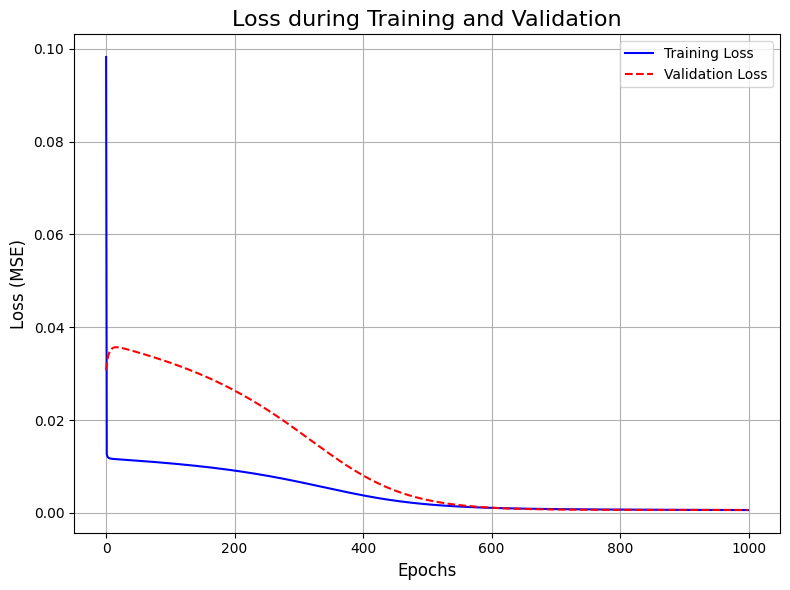

In [ ]:
import matplotlib.pyplot as plt

# Menampilkan grafik Loss selama pelatihan
plt.figure(figsize=(8, 6))

# Plot Training Loss
plt.plot(train_losses, label='Training Loss', color='blue')

# Plot Test Loss (Validation Loss)
plt.plot(test_losses, label='Validation Loss', linestyle='--', color='red')

# Menambahkan label dan judul
plt.title('Loss during Training and Validation', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)

# Menambahkan legenda
plt.legend()

# Menambahkan grid
plt.grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()

## Visualisasi

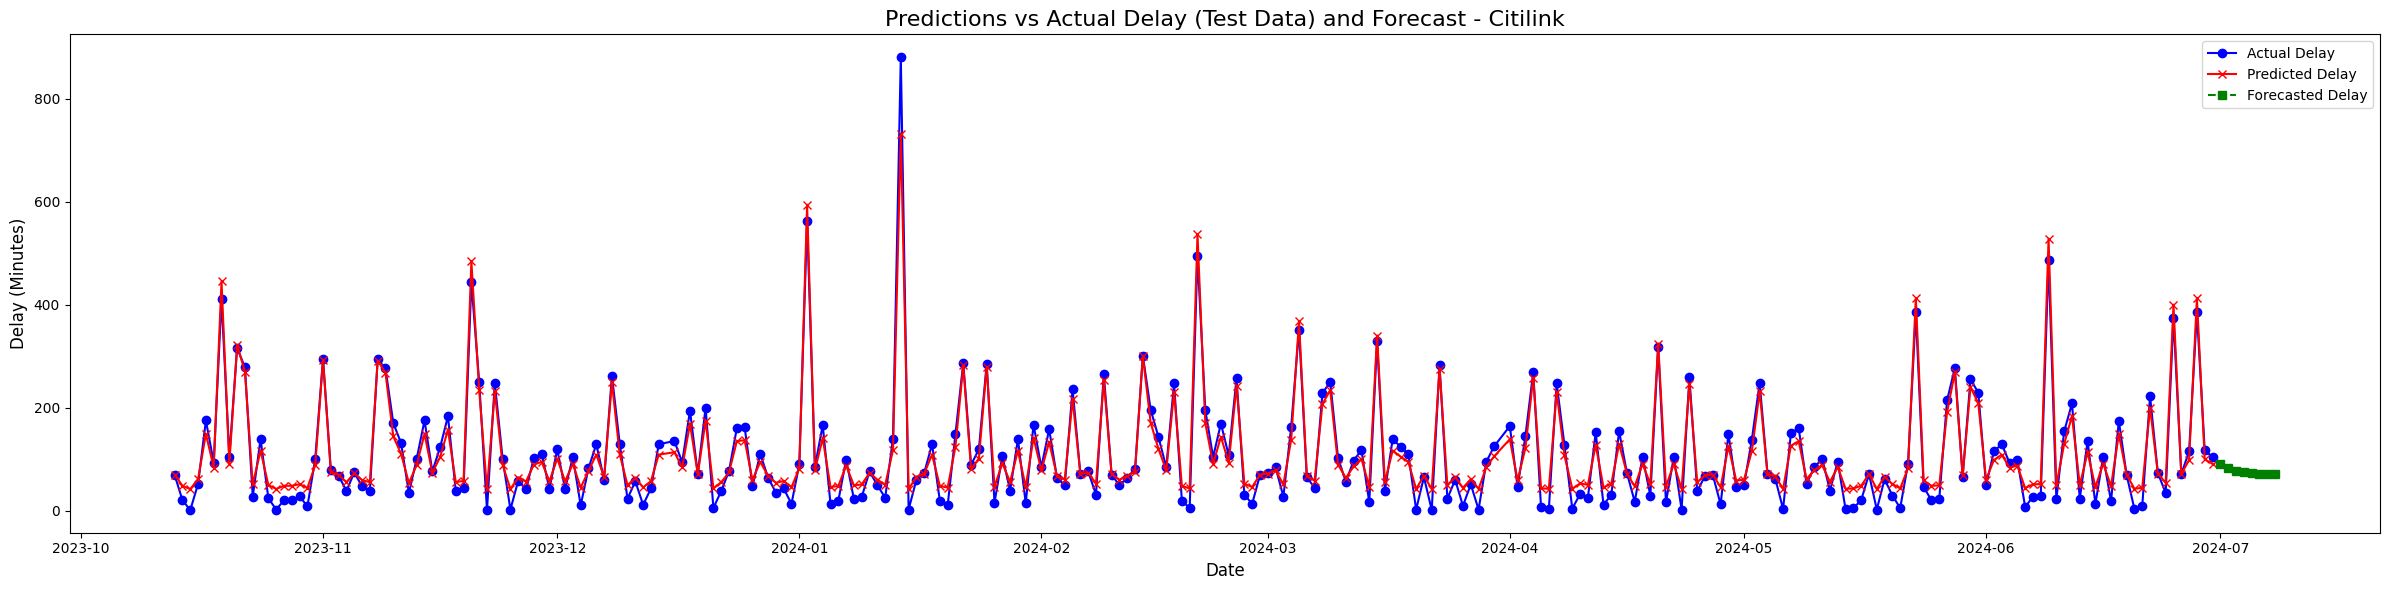

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Pastikan kolom TGL dalam format datetime
df['TGL'] = pd.to_datetime(df['TGL'])

# Visualisasi hasil prediksi dan nilai asli pada data pengujian
plt.figure(figsize=(24, 6))

# Plot nilai asli (delay) untuk data test
plt.plot(df['TGL'].iloc[len(X_train):], scaler_y.inverse_transform(y_test), label='Actual Delay', color='blue', marker='o', linestyle='-', markersize=6)

# Plot hasil prediksi pada data test
plt.plot(df['TGL'].iloc[len(X_train):], predictions, label='Predicted Delay', color='red', marker='x', linestyle='-', markersize=6)

# Menambahkan hasil forecast untuk 8 periode ke depan
forecast_dates = pd.date_range(df['TGL'].iloc[len(X_train):].iloc[-1], periods=9, freq='D')[1:]  # Mengambil tanggal setelah data test terakhir
plt.plot(forecast_dates, forecast_values_original_scale.flatten(), label='Forecasted Delay', color='green', marker='s', linestyle='--', markersize=6)

# Menambahkan label dan judul
plt.title('Predictions vs Actual Delay (Test Data) and Forecast - Citilink', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Delay (Minutes)', fontsize=12)

# Menambahkan legenda
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


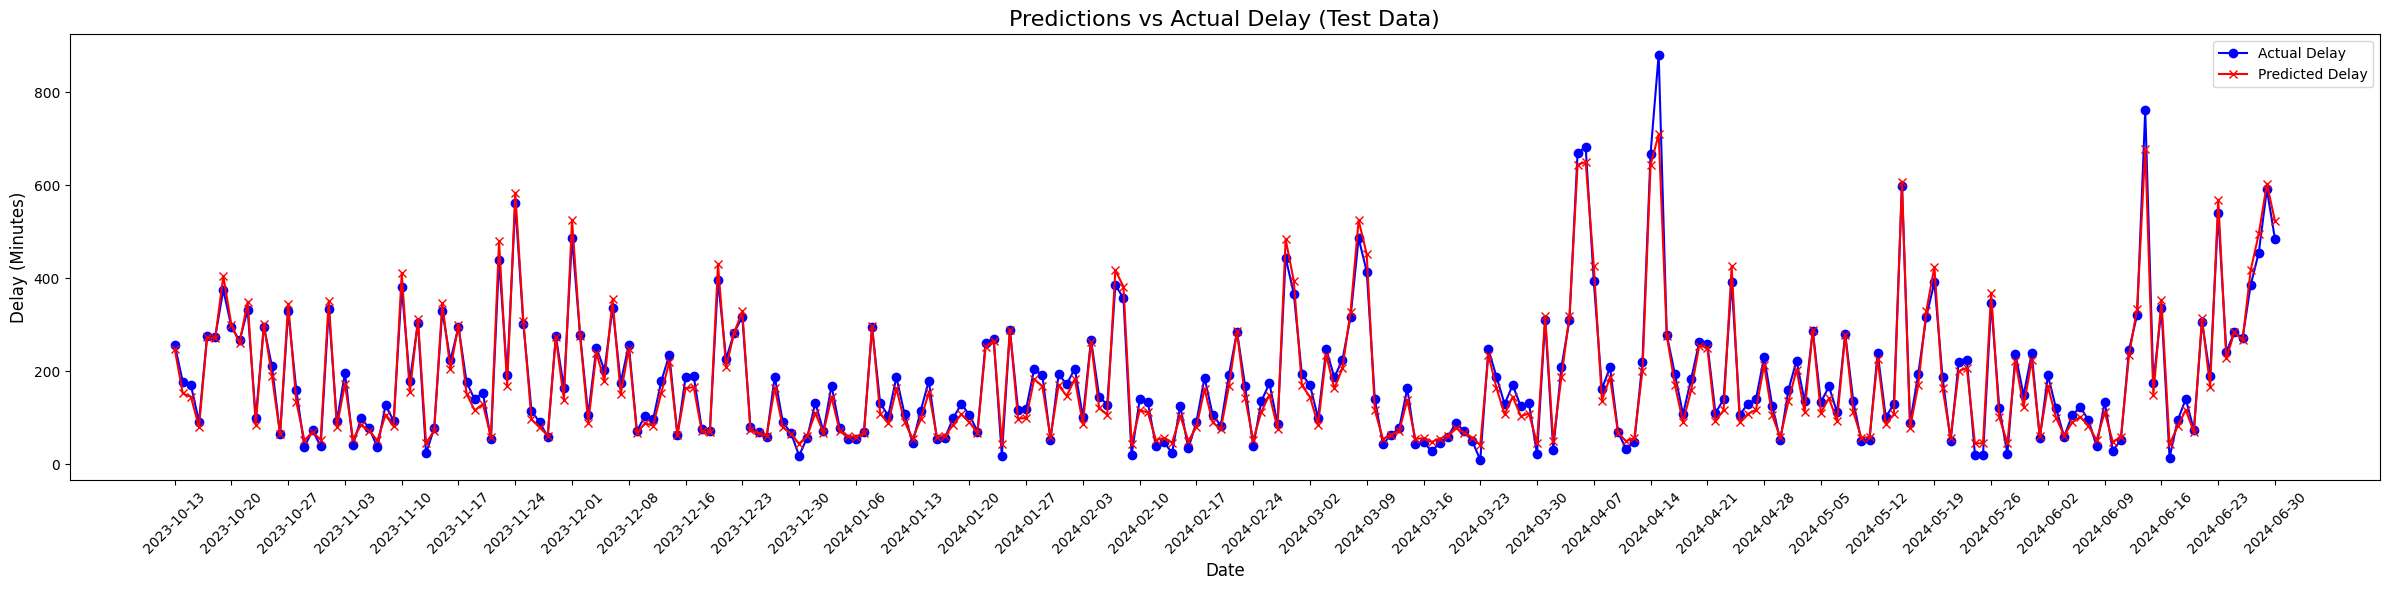

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Visualisasi hasil prediksi dan nilai asli pada data pengujian
plt.figure(figsize=(24, 6))

# Plot nilai asli (delay) untuk data test
plt.plot(df['TGL'].iloc[len(X_train):], scaler_y.inverse_transform(y_test), label='Actual Delay', color='blue', marker='o', linestyle='-', markersize=6)

# Plot hasil prediksi pada data test
plt.plot(df['TGL'].iloc[len(X_train):], predictions, label='Predicted Delay', color='red', marker='x', linestyle='-', markersize=6)

# Menambahkan label dan judul
plt.title('Predictions vs Actual Delay (Test Data)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Delay (Minutes)', fontsize=12)

# Mengatur format tanggal dan menampilkan setiap kelipatan 7 hari
plt.xticks(df['TGL'].iloc[len(X_train):][::7], rotation=45)

# Menambahkan legenda
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Pastikan data yang digunakan untuk DataFrame adalah 1D
actual_delay = scaler_y.inverse_transform(y_test).flatten()  # Meratakan array 2D menjadi 1D
predicted_delay = predictions.flatten()  # Meratakan array 2D menjadi 1D

# Membuat DataFrame untuk perbandingan nilai actual dan prediksi
comparison_df = pd.DataFrame({
    'TGL': df['TGL'].iloc[len(X_train):].values,  # Mengambil tanggal pada data test
    'Actual Delay': actual_delay,  # Nilai asli (delay) pada data test
    'Predicted Delay': predicted_delay  # Hasil prediksi pada data test
})

# Menampilkan tabel perbandingan
print(comparison_df)

comparison_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Skripsi/dataset/predictionCitilink.csv', index=False)

           TGL  Actual Delay  Predicted Delay
0   2023-10-13          69.0        69.808825
1   2023-10-14          20.0        48.151270
2   2023-10-15           1.0        41.709759
3   2023-10-16          52.0        61.387949
4   2023-10-17         175.0       149.042787
..         ...           ...              ...
255 2024-06-26          71.0        70.868600
256 2024-06-27         115.0        98.202164
257 2024-06-28         385.0       412.801362
258 2024-06-29         117.0        99.637407
259 2024-06-30         104.0        90.617717

[260 rows x 3 columns]


In [ ]:
import numpy as np

# Inisialisasi variabel untuk menyimpan hasil forecast
forecast_values = []

# Data input terakhir yang akan digunakan untuk memulai peramalan
current_input = X_test[-1].reshape(1, -1)  # Mengambil input terakhir untuk memulai

# Lakukan peramalan 8 periode ke depan
for period in range(8):
    # Prediksi untuk periode ke-1, ke-2, ..., ke-8
    forecast = nn.feedforward(current_input)

    # Simpan hasil prediksi
    forecast_values.append(forecast[0])  # Mengambil hasil prediksi pertama

    # Update input untuk periode berikutnya (menggunakan prediksi sebagai input untuk periode selanjutnya)
    current_input = forecast.reshape(1, -1)

# Mengembalikan hasil prediksi ke skala asli
forecast_values_original_scale = scaler_y.inverse_transform(np.array(forecast_values).reshape(-1, 1))